# Q-learning

$$ G_t = r_{t+1} + \gamma \max_{a}[Q(s_{t+1},a)] $$

# SARSA(State-Action-Reward-State-Action)

$$ G_t = r_{t+1} + \gamma Q(s_{t+1},a_{t+1}) $$
ただし、policy($=\pi$) について $$ a_{t+1} = \pi(s_{t+1}) $$

# Actor-Critic

> これまでの方法は未来でもらえる報酬を次のようにして獲得してきた。
$$ G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+2} + \dots + \gamma^{T-t-1} r_{T} $$
しかし、Actor-Criticでは、Actorは報酬の予測はせず、報酬の評価はCriticに任せる

In [ ]:
import gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Actor:
    def __init__(self, env):
        self.env = env
        self.Q = {}
        self.initialize()

    def initialize(self):
        for s in range(self.env.nS):
            self.Q[s] = [0] * self.env.nA#すべての状態に対する報酬を0として初期化する
        self.env.reset()

    def policy(self, s, epsilon = 0.1):
        if np.random.random() < epsilon:
            return np.random.randint(self.env.nA)
        else:
            if sum(self.Q[s]) == 0:
                return np.random.randint(self.env.nA)
            else:
                return np.argmax(self.Q[s])

class Critic:
    def __init__(self, env):
        self.V = np.zeros(env.nS)

class ActorCritic:
    def __init__(self, env, actor_class, critic_class):
        self.env = env
        self.actor_class = actor_class
        self.critic_class = critic_class
        self.reward_log = []
    
    def learn(self, episode_count = 1000, gamma=0.9, alpha=0.8):
        actor = self.actor_class(self.env)
        critic = self.critic_class(self.env)

        for e in range(episode_count):
            env.reset()
            done = False  
            s = 0 
            while not done:
                a = actor.policy(s)
                next_s, reward, done , _ = self.env.step(a)

                G = reward + gamma * critic.V[next_s]
                actor.Q[s][a] += alpha * (G - critic.V[s])
                critic.V[s] += alpha * (G - critic.V[s])

                s = next_s
            else:
                self.reward_log.append(reward)

    def show_rewards(self, interval = 50):
        average_rewards = {}
        for e in range(0, len(self.reward_log), interval):
            average_rewards[e] = np.mean(self.reward_log[e:e+50])
        return pd.Series(average_rewards).plot()

In [ ]:
env = gym.make('FrozenLake-v0',is_slippery=False)

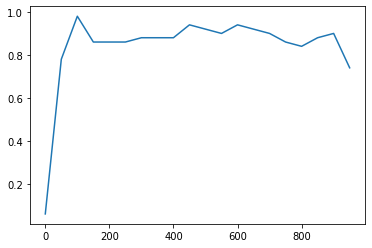

In [ ]:
ac = ActorCritic(env, Actor, Critic)
ac.learn()
ac.show_rewards()

In [ ]:
env.reset()
a = 1
next_s, reward, done , _ = env.step(a)
print(next_s)
print(reward)

4
0.0
